In [1]:
# Note: please install required libraries before importing them!
# Import required libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# Basemap and Projection

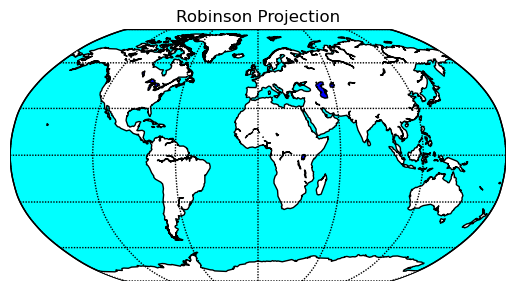

In [2]:
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
# Basemap setup - Robinson Projection (projection type can be changed based on need)
robin = Basemap(projection='robin',lon_0=0,resolution='c')
robin.drawcoastlines()
robin.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
robin.drawparallels(np.arange(-90.,120.,30.))
robin.drawmeridians(np.arange(0.,360.,60.))
robin.drawmapboundary(fill_color='aqua') 
#robin.bluemarble()
plt.title("Robinson Projection")
plt.show()

# Plot data on the map and save as a high resolution image

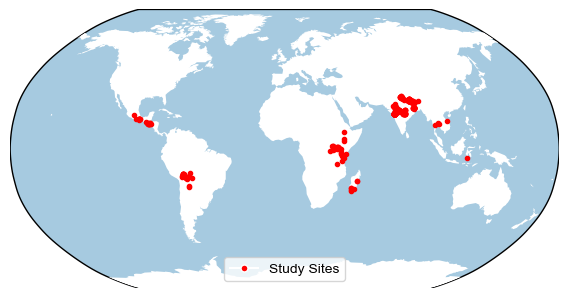

In [4]:
# # Libraries

# Create a Basemap instance
study_loc = Basemap(lat_0=0, lon_0=0, projection='robin')

# Draw the map boundary and fill continents
study_loc.drawmapboundary(fill_color='#A6CAE0')
study_loc.fillcontinents(color='white', alpha=1)

# Read the shapefile
shapefile_path = "~/ifri_loc" # path of your shapefile
study_loc.readshapefile(shapefile_path, 'ifri')

# Plot points from the shapefile and store coordinates for legend
legend_coords = []
for point in study_loc.ifri:
    lon, lat = point  # Extract latitude and longitude
    study_loc.plot(lon, lat, marker='o', color='red', markersize=3)  # Plot points with red color and size 3
    legend_coords.append((lon, lat))  # Append coordinates for legend

# Add legend
legend_labels = ['Study Sites']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5)]
plt.legend(legend_markers, legend_labels, loc='lower center',prop={'family': 'Arial'})

# Set figure size and resolution
plt.gcf().set_size_inches(7.0866, 4)  # 180 mm width, 300 dpi
plt.savefig('finalized_map.png', dpi=300)  # Save the figure with 300 dpi resolution

# Display the map with shapefile and legend
plt.show()